In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data/dataset.csv', encoding='latin-1')

In [3]:
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")

In [7]:
date_len = len(df['InvoiceDate'].unique())
print(date_len)

23260


In [8]:
df.shape

(541909, 8)

In [9]:
cus_len = len(df['CustomerID'].unique())
print(cus_len)

4373


In [10]:
sorted_column = df['InvoiceDate'].sort_values()

n = len(sorted_column)
q1_pos = (n + 1) / 4
q2_pos = (2 * (n + 1)) / 4
q3_pos = (3 * (n + 1)) / 4

q1_pos = int(q1_pos) if q1_pos.is_integer() else round(q1_pos)
q2_pos = int(q2_pos) if q2_pos.is_integer() else round(q2_pos)
q3_pos = int(q3_pos) if q3_pos.is_integer() else round(q3_pos)

q1 = sorted_column.iloc[q1_pos - 1]
q2 = sorted_column.iloc[q2_pos - 1]
q3 = sorted_column.iloc[q3_pos - 1]

def assign_quartile_label(value):
    if value <= q1:
        return 'Q1'
    elif value <= q2:
        return 'Q2'
    elif value <= q3:
        return 'Q3'
    else:
        return 'Q4'

df['Date_Quartile'] = df['InvoiceDate'].apply(assign_quartile_label)

quartile_counts = df['Date_Quartile'].value_counts()
print(quartile_counts)

Q3    135486
Q1    135485
Q2    135474
Q4    135464
Name: Date_Quartile, dtype: int64


In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Q1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Q1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Q1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Q1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Q1


In [12]:
df['Frequency'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile,Frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Q1,35.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Q1,35.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Q1,35.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Q1,35.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Q1,35.0


In [14]:
df['Frequency'] = df['Frequency'].dropna()

In [15]:
df['Frequency'].unique()

array([ 35.,  18.,   5.,   6.,  20.,  27.,  15., 118.,  86.,   7.,   1.,
         3.,  76.,   2.,  46.,  81.,  52.,  13.,  10.,   4.,  22.,   8.,
        17.,  nan,  60.,  28.,  21., 224.,  12., 248., 169.,  16.,  50.,
        41.,  19.,   9.,  11., 128.,  49.,  23.,  30.,  31.,  55.,  89.,
        14.,  66.,  63.,  39.,  26.,  54.,  29.,  24.,  75.,  43.,  33.,
        38.,  36.,  62.,  40.,  25.,  34.,  45.,  77.,  51.,  53.,  32.])

In [16]:
df['Frequency'] = df['Frequency'].astype(str)
df['CustomerID'] = df['CustomerID'].astype(str)

In [17]:
unique_lengths = df['CustomerID'].value_counts()
print(unique_lengths)

nan        135080
17841.0      7983
14911.0      5903
14096.0      5128
12748.0      4642
            ...  
13270.0         1
17763.0         1
17291.0         1
15668.0         1
15562.0         1
Name: CustomerID, Length: 4373, dtype: int64


In [18]:
df = df[df['CustomerID'] != 'nan']

In [19]:
df.dtypes

InvoiceNo                object
StockCode                object
Description              object
Quantity                  int64
InvoiceDate      datetime64[ns]
UnitPrice               float64
CustomerID               object
Country                  object
Date_Quartile            object
Frequency                object
dtype: object

In [20]:
df['Frequency'] = pd.to_numeric(df['Frequency'], errors='coerce')

In [21]:
sorted_column = df['Frequency'].sort_values()

n = len(sorted_column)
q1_pos = (n + 1) / 4
q2_pos = (2 * (n + 1)) / 4
q3_pos = (3 * (n + 1)) / 4

q1_pos = int(q1_pos) if q1_pos.is_integer() else round(q1_pos)
q2_pos = int(q2_pos) if q2_pos.is_integer() else round(q2_pos)
q3_pos = int(q3_pos) if q3_pos.is_integer() else round(q3_pos)

q1 = sorted_column.iloc[q1_pos - 1]
q2 = sorted_column.iloc[q2_pos - 1]
q3 = sorted_column.iloc[q3_pos - 1]

def assign_quartile_label(value):
    if value <= q1:
        return 'Q1'
    elif value <= q2:
        return 'Q2'
    elif value <= q3:
        return 'Q3'
    else:
        return 'Q4'

df['Frequency_Quartile'] = df['Frequency'].apply(assign_quartile_label)

quartile_counts = df['Frequency_Quartile'].value_counts()
print(quartile_counts)

Q1    119663
Q4    101293
Q3     99003
Q2     86870
Name: Frequency_Quartile, dtype: int64


In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile,Frequency,Frequency_Quartile
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Q1,35.0,Q4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Q1,35.0,Q4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Q1,35.0,Q4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Q1,35.0,Q4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Q1,35.0,Q4


In [23]:
df['Monetary_Value'] = df['Frequency'] * df['UnitPrice']

In [24]:
sorted_column = df['Monetary_Value'].sort_values()

n = len(sorted_column)
q1_pos = (n + 1) / 4
q2_pos = (2 * (n + 1)) / 4
q3_pos = (3 * (n + 1)) / 4

q1_pos = int(q1_pos) if q1_pos.is_integer() else round(q1_pos)
q2_pos = int(q2_pos) if q2_pos.is_integer() else round(q2_pos)
q3_pos = int(q3_pos) if q3_pos.is_integer() else round(q3_pos)

q1 = sorted_column.iloc[q1_pos - 1]
q2 = sorted_column.iloc[q2_pos - 1]
q3 = sorted_column.iloc[q3_pos - 1]

def assign_quartile_label(value):
    if value <= q1:
        return 'Q1'
    elif value <= q2:
        return 'Q2'
    elif value <= q3:
        return 'Q3'
    else:
        return 'Q4'

df['Monetary_Quartile'] = df['Monetary_Value'].apply(assign_quartile_label)

quartile_counts = df['Monetary_Quartile'].value_counts()
print(quartile_counts)

Q2    102546
Q1    102206
Q4    101642
Q3    100435
Name: Monetary_Quartile, dtype: int64


In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile,Frequency,Frequency_Quartile,Monetary_Value,Monetary_Quartile
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Q1,35.0,Q4,89.25,Q4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Q1,35.0,Q4,118.65,Q4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Q1,35.0,Q4,96.25,Q4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Q1,35.0,Q4,118.65,Q4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Q1,35.0,Q4,118.65,Q4


In [26]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile,Frequency,Frequency_Quartile,Monetary_Value,Monetary_Quartile
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Q4,4.0,Q1,3.4,Q1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Q4,4.0,Q1,8.4,Q2
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Q4,4.0,Q1,16.6,Q3
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Q4,4.0,Q1,16.6,Q3
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,Q4,4.0,Q1,19.8,Q3


In [27]:
df['Date_Quartile'] = df['Date_Quartile'].astype(str)
df ['Frequency_Quartile'] = df ['Frequency_Quartile'].astype(str)
df['Monetary_Quartile'] = df['Monetary_Quartile'].astype(str)

In [28]:
df = df.replace({"Q1": 1, "Q2": 2, "Q3": 3, "Q4": 4})

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile,Frequency,Frequency_Quartile,Monetary_Value,Monetary_Quartile
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,35.0,4,89.25,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,118.65,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,35.0,4,96.25,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,118.65,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,118.65,4


In [30]:
df['Concatenated'] = df['Date_Quartile'].astype(str) + df['Frequency_Quartile'].astype(str) + df['Monetary_Quartile'].astype(str)

In [31]:
df['Concatenated'].unique()

array(['144', '133', '134', '132', '122', '143', '124', '142', '123',
       '112', '111', '114', '113', '141', '131', '121', '211', '212',
       '213', '244', '243', '233', '234', '232', '231', '222', '223',
       '221', '224', '214', '242', '241', '334', '332', '331', '333',
       '323', '321', '322', '343', '344', '341', '312', '314', '342',
       '311', '313', '324', '413', '411', '414', '412', '444', '443',
       '422', '433', '434', '432', '431', '421', '423', '424', '441',
       '442'], dtype=object)

In [32]:
df['Concatenated'].astype(int)

0         144
1         144
2         144
3         144
4         144
         ... 
541904    411
541905    412
541906    413
541907    413
541908    413
Name: Concatenated, Length: 406829, dtype: int32

In [33]:
len_concat = len(df['Concatenated'].unique())
len_Cus = len(df['CustomerID'].unique())

print(len_concat, len_Cus)

64 4372


In [34]:
import matplotlib.pyplot as plt

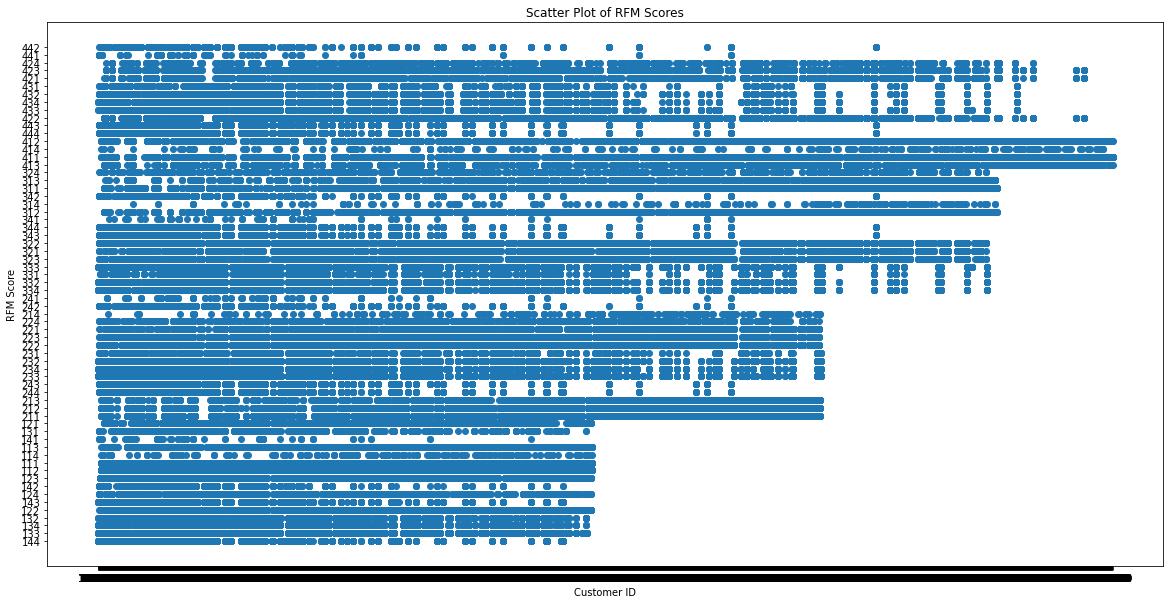

In [35]:
#unique_customer_ids = df['CustomerID'].unique()

plt.figure(figsize=(20, 10))
plt.scatter(df['CustomerID'], df['Concatenated'])
plt.xlabel('Customer ID')
plt.ylabel('RFM Score')
plt.title('Scatter Plot of RFM Scores')
plt.show()

In [36]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile,Frequency,Frequency_Quartile,Monetary_Value,Monetary_Quartile,Concatenated
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,35.0,4,89.25,4,144
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,118.65,4,144
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,35.0,4,96.25,4,144
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,118.65,4,144
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,118.65,4,144


In [37]:
df.to_csv('Drfm.csv', index=False)

In [45]:
df['Money'] = df['UnitPrice'] * df['Quantity']

In [50]:
df['Money_value'] = df.groupby('CustomerID')['Money'].transform('sum')

In [51]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile,Frequency,Frequency_Quartile,Monetary_Value,Monetary_Quartile,Concatenated,Money,Money_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,35.0,4,89.25,4,144,15.30,5288.63
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,118.65,4,144,20.34,5288.63
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,35.0,4,96.25,4,144,22.00,5288.63
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,118.65,4,144,20.34,5288.63
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,118.65,4,144,20.34,5288.63


In [54]:
len(df['Money_value'].unique())

4288

In [55]:
df.drop('Monetary_Value', axis='columns', inplace=True)
df.drop('Monetary_Quartile', axis='columns', inplace=True)
df.drop('Concatenated', axis='columns', inplace=True)

In [56]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile,Frequency,Frequency_Quartile,Money,Money_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,35.0,4,15.30,5288.63
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,35.0,4,22.00,5288.63
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63


In [57]:
sorted_column = df['Money_value'].sort_values()

n = len(sorted_column)
q1_pos = (n + 1) / 4
q2_pos = (2 * (n + 1)) / 4
q3_pos = (3 * (n + 1)) / 4

q1_pos = int(q1_pos) if q1_pos.is_integer() else round(q1_pos)
q2_pos = int(q2_pos) if q2_pos.is_integer() else round(q2_pos)
q3_pos = int(q3_pos) if q3_pos.is_integer() else round(q3_pos)

q1 = sorted_column.iloc[q1_pos - 1]
q2 = sorted_column.iloc[q2_pos - 1]
q3 = sorted_column.iloc[q3_pos - 1]

def assign_quartile_label(value):
    if value <= q1:
        return 'Q1'
    elif value <= q2:
        return 'Q2'
    elif value <= q3:
        return 'Q3'
    else:
        return 'Q4'

df['Monetary_Quartile'] = df['Money_value'].apply(assign_quartile_label)

quartile_counts = df['Monetary_Quartile'].value_counts()
print(quartile_counts)

Q2    101805
Q1    101717
Q4    101704
Q3    101603
Name: Monetary_Quartile, dtype: int64


In [58]:
df['Monetary_Quartile'] = df['Monetary_Quartile'].astype(str)

df = df.replace({"Q1": 1, "Q2": 2, "Q3": 3, "Q4": 4})

df['RFM'] = df['Date_Quartile'].astype(str) + df['Frequency_Quartile'].astype(str) + df['Monetary_Quartile'].astype(str)

In [59]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date_Quartile,Frequency,Frequency_Quartile,Money,Money_value,Monetary_Quartile,RFM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,35.0,4,15.30,5288.63,3,143
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,35.0,4,22.00,5288.63,3,143
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35.0,4,20.34,5288.63,3,143


In [60]:
df.to_csv('Data/rfm.csv', index=False)

In [61]:
df.dtypes

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                    object
Country                       object
Date_Quartile                  int64
Frequency                    float64
Frequency_Quartile             int64
Money                        float64
Money_value                  float64
Monetary_Quartile              int64
RFM                           object
dtype: object

In [62]:
df['RFM'] = df['RFM'].astype(int)

In [63]:
df.to_csv('Data/rfm.csv', index=False)